# Data Project: Pharmaceutical Prices and Competition

## Introduction 
This data project examines the effect of competition--measured in number of substitutes--on the price development of pharmaceuticals. The idea has been adapted from the kindly suggested topic. The idea being that the number of substitutes to act as a strong indicator of the level of competition on a market and that competition generally dampens price increases. Practically, only products which have been on the market during the entire examined period (March 2015 to March 2020) and with rapported AUP pr. DDD (consumers' price per day) have been considered. Due to differences in typical market strategies across different pharmaceutical categories, some bias may occur from this method. It is not possible to predict the direction of the bias without thorough research of pharmaceutical products, which is deemed outside of the scope of this project. 
Firstly, median period to period price changes are considered for each level of competition. ALthough differences are apparent, no trends are dicernable. Secondly, the median price changes from the entire period is inspected, so as to paint a more uniform piture. Although it is clear that the variance of the median price changes increase in relation to number of substitutes, no definite answer to the question is found here either.

Imports and set magics:

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from datetime import datetime

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Medicinal price data

In [2]:
# load data
prices = pd.read_excel('lmpriser_eSundhed_200323.xlsx', sheet_name = 'DATA')

# drop columns
drop_these = ['Lægemiddel', 'Varenummer',  'Pakning', 'Styrke', 'Form', 'Firma', 'Indikator']
prices.drop(drop_these, axis=1, inplace=True)

# drop all but AUP pr. DDD rows seeing as this is the pertinent price metric
prices = prices[3::4]

# drop all rows lacking AUP pr. DDD data
prices = prices.dropna()

# reset index
prices = prices.reset_index(drop=True)

# show
display(prices)

,ATC,20150202,20150216,20150302,20150316,20150330,20150413,20150427,20150511,20150525,...,20191118,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323
0,A01AB09,17.262500,17.262500,17.262500,17.262500,17.262500,17.262500,16.762500,16.762500,16.762500,...,12.137500,12.137500,12.137500,12.137500,13.675000,13.675000,13.675000,13.675000,13.675000,13.675000
1,A01AD02,2.269000,2.269000,2.269000,2.269000,2.269000,2.269000,2.226000,2.226000,2.226000,...,1.827000,1.788000,1.757000,1.630000,1.626000,1.539000,1.392000,1.392000,1.392000,1.392000
2,A02BB01,13.816667,13.816667,13.816667,13.816667,13.816667,13.816667,13.656667,13.656667,13.656667,...,16.550000,16.550000,16.550000,16.550000,16.506667,16.506667,16.506667,16.506667,16.506667,16.506667
3,A02BC01,16.405357,16.405357,16.405357,16.405357,16.405357,16.405357,16.327679,16.327679,16.327679,...,16.120536,16.120536,16.120536,16.120536,16.075893,16.075893,16.075893,16.075893,16.075893,16.075893
4,A02BC01,1.369167,1.369167,1.369167,1.369167,1.369167,1.369167,1.335000,1.335000,1.335000,...,3.495000,3.441667,3.529167,3.506667,3.529167,3.529167,3.493333,3.368333,3.171667,2.847500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,V03AF04,488.302340,488.302340,488.302340,488.302340,488.302340,488.302340,485.872825,485.872825,485.872825,...,621.925615,621.925615,621.925615,621.925615,620.215957,620.215957,620.215957,620.215957,620.215957,620.215957
2586,V03AF04,419.586834,419.586834,419.586834,419.586834,419.586834,419.586834,418.121035,418.121035,418.121035,...,538.119321,538.119321,538.119321,538.119321,536.636379,536.636379,536.636379,536.636379,536.636379,536.636379
2587,V03AF07,6378.504673,6378.504673,6378.504673,6378.504673,6378.504673,6378.504673,6355.295950,6355.295950,6355.295950,...,5689.252336,5547.663551,5547.663551,5547.663551,5532.242991,5532.242991,5532.242991,5532.242991,5532.242991,5532.242991
2588,V03AF07,6252.145522,6252.145522,6252.145522,6252.145522,6252.145522,6252.145522,6231.529851,6231.529851,6231.529851,...,5583.022388,5443.750000,5443.750000,5443.750000,5428.731343,5428.731343,5428.731343,5428.731343,5428.731343,5428.731343


In [3]:
# find lowest price grouped by ATC for each period 
grouped_prices = prices.groupby('ATC')
grouped_prices = grouped_prices.agg(np.min)

# show
display(grouped_prices)

,20150202,20150216,20150302,20150316,20150330,20150413,20150427,20150511,20150525,20150608,...,20191118,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323
ATC,,,,,,,,,,,,,,,,,,,,,
A01AB09,17.262500,17.262500,17.262500,17.262500,17.262500,17.262500,16.762500,16.762500,16.762500,16.762500,...,12.137500,12.137500,12.137500,12.137500,13.675000,13.675000,13.675000,13.675000,13.675000,13.675000
A01AD02,2.269000,2.269000,2.269000,2.269000,2.269000,2.269000,2.226000,2.226000,2.226000,2.226000,...,1.827000,1.788000,1.757000,1.630000,1.626000,1.539000,1.392000,1.392000,1.392000,1.392000
A02BB01,13.816667,13.816667,13.816667,13.816667,13.816667,13.816667,13.656667,13.656667,13.656667,13.656667,...,16.550000,16.550000,16.550000,16.550000,16.506667,16.506667,16.506667,16.506667,16.506667,16.506667
A02BC01,0.331000,0.331000,0.316000,0.316000,0.316000,0.316000,0.296500,0.296500,0.281000,0.267500,...,0.317000,0.298000,0.281500,0.246000,0.245000,0.286000,0.286000,0.254500,0.253500,0.266500
A02BC02,0.340500,0.354000,0.353500,0.340500,0.340500,0.313000,0.294000,0.352500,0.351000,0.336500,...,2.016000,1.723500,1.723500,2.002041,2.010500,1.185714,1.075000,0.882653,0.717347,0.575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V03AE03,77.826250,77.826250,77.826250,77.826250,77.826250,77.826250,77.566250,77.566250,77.566250,77.566250,...,76.873750,76.873750,76.873750,76.873750,76.661250,76.661250,76.661250,76.661250,76.661250,76.661250
V03AE05,71.046667,71.046667,71.046667,71.046667,71.046667,71.046667,70.790000,70.790000,70.790000,70.790000,...,70.106667,70.106667,70.106667,70.106667,69.913333,69.913333,69.913333,69.913333,69.913333,69.913333
V03AF04,147.020000,147.020000,147.020000,147.020000,147.020000,147.020000,145.880000,145.880000,145.880000,145.880000,...,327.340000,327.340000,327.340000,327.340000,326.440000,326.440000,326.440000,326.440000,326.440000,326.440000


In [4]:
# Find changes in lowest price (AUP pr. DDD) for each ATC in each period 
pct_change = grouped_prices.pct_change(axis='columns', fill_method='ffill')

# removing missing values from first period
pct_change.drop(20150202, axis=1, inplace=True)

# show
display(pct_change)

,20150216,20150302,20150316,20150330,20150413,20150427,20150511,20150525,20150608,20150622,...,20191118,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323
ATC,,,,,,,,,,,,,,,,,,,,,
A01AB09,0.000000,0.000000,0.000000,0.0,0.000000,-0.028965,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.126674,0.000000,0.000000,0.000000,0.000000,0.000000
A01AD02,0.000000,0.000000,0.000000,0.0,0.000000,-0.018951,0.00000,0.000000,0.000000,0.000000,...,0.000000,-0.021346,-0.017338,-0.072282,-0.002454,-0.053506,-0.095517,0.000000,0.000000,0.000000
A02BB01,0.000000,0.000000,0.000000,0.0,0.000000,-0.011580,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.002618,0.000000,0.000000,0.000000,0.000000,0.000000
A02BC01,0.000000,-0.045317,0.000000,0.0,0.000000,-0.061709,0.00000,-0.052277,-0.048043,0.000000,...,0.140288,-0.059937,-0.055369,-0.126110,-0.004065,0.167347,0.000000,-0.110140,-0.003929,0.051282
A02BC02,0.039648,-0.001412,-0.036775,0.0,-0.080764,-0.060703,0.19898,-0.004255,-0.041311,0.043091,...,0.000000,-0.145089,0.000000,0.161613,0.004225,-0.410239,-0.093373,-0.178927,-0.187283,-0.198435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V03AE03,0.000000,0.000000,0.000000,0.0,0.000000,-0.003341,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.002764,0.000000,0.000000,0.000000,0.000000,0.000000
V03AE05,0.000000,0.000000,0.000000,0.0,0.000000,-0.003613,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.002758,0.000000,0.000000,0.000000,0.000000,0.000000
V03AF04,0.000000,0.000000,0.000000,0.0,0.000000,-0.007754,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.002749,0.000000,0.000000,0.000000,0.000000,0.000000


**Count ATC duplicates:**

In [5]:
dups_ATC = prices.pivot_table(index=['ATC'], aggfunc='size')

#Change type of dups_ATC from series to dataframe
dups_ATC = dups_ATC.to_frame()

# rename column
dups_ATC= dups_ATC.rename(columns = {0:'dublicates'})

# show
display(dups_ATC)

,dublicates
ATC,
A01AB09,1
A01AD02,1
A02BB01,1
A02BC01,10
A02BC02,17
...,...
V03AE03,5
V03AE05,1
V03AF04,4


**Merge dataframe with price change data and dataframe with dublicate data:**

In [10]:
merged = pd.merge(pct_change, dups_ATC, on='ATC', how='left')

# show
display(merged)

,20150216,20150302,20150316,20150330,20150413,20150427,20150511,20150525,20150608,20150622,...,20191202,20191216,20191230,20200113,20200127,20200210,20200224,20200309,20200323,dublicates
ATC,,,,,,,,,,,,,,,,,,,,,
A01AB09,0.000000,0.000000,0.000000,0.0,0.000000,-0.028965,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.126674,0.000000,0.000000,0.000000,0.000000,0.000000,1
A01AD02,0.000000,0.000000,0.000000,0.0,0.000000,-0.018951,0.00000,0.000000,0.000000,0.000000,...,-0.021346,-0.017338,-0.072282,-0.002454,-0.053506,-0.095517,0.000000,0.000000,0.000000,1
A02BB01,0.000000,0.000000,0.000000,0.0,0.000000,-0.011580,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.002618,0.000000,0.000000,0.000000,0.000000,0.000000,1
A02BC01,0.000000,-0.045317,0.000000,0.0,0.000000,-0.061709,0.00000,-0.052277,-0.048043,0.000000,...,-0.059937,-0.055369,-0.126110,-0.004065,0.167347,0.000000,-0.110140,-0.003929,0.051282,10
A02BC02,0.039648,-0.001412,-0.036775,0.0,-0.080764,-0.060703,0.19898,-0.004255,-0.041311,0.043091,...,-0.145089,0.000000,0.161613,0.004225,-0.410239,-0.093373,-0.178927,-0.187283,-0.198435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V03AE03,0.000000,0.000000,0.000000,0.0,0.000000,-0.003341,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.002764,0.000000,0.000000,0.000000,0.000000,0.000000,5
V03AE05,0.000000,0.000000,0.000000,0.0,0.000000,-0.003613,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.002758,0.000000,0.000000,0.000000,0.000000,0.000000,1
V03AF04,0.000000,0.000000,0.000000,0.0,0.000000,-0.007754,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.002749,0.000000,0.000000,0.000000,0.000000,0.000000,4


In [45]:
#Calculate mean price change for each ATC group in all periods. Also reset index
merged_mean = merged.groupby('dublicates').agg('mean').round(2).reset_index()

# convert to long format
merged_mean_long = pd.melt(merged_mean ,id_vars=['dublicates'],var_name='date', value_name='price_change')

# convert date float to datetime format
merged_mean_long['date'] = pd.to_datetime(merged_mean_long['date'], format='%Y%m%d')

# show
display(merged_mean_long)


,dublicates,date,price_change
0,1,2015-02-16,0.01
1,2,2015-02-16,0.00
2,3,2015-02-16,-0.01
3,4,2015-02-16,0.01
4,5,2015-02-16,-0.01
...,...,...,...
3881,29,2020-03-23,0.00
3882,30,2020-03-23,0.00
3883,33,2020-03-23,0.00
3884,37,2020-03-23,0.00


**Visual analysis**

In [46]:
merged_mean_long.groupby('dublicates').agg(['mean']).round(3)

,price_change
,mean
dublicates,
1,0.003
2,0.003
3,0.007
4,0.012
5,0.007
6,0.007
7,0.005
8,0.017


## Analysis

Thorugh tables and plots the price data is reviewed. Firstly interactive and very detailed, secondly a finishing overview.

In [49]:
def plot_price_changes(merged_mean,dublicates): 
    
        df = merged_mean
        y = 'price_change'
        
        I = df['dublicates'] == dublicates
        ax = df.loc[I,:].plot(x='date', y=y, style='-o')
        
widgets.interact(plot_price_changes, 
    
    merged_mean = widgets.fixed(merged_mean_long),
    dublicates = widgets.Dropdown(description='dublicates', 
                                    options=merged_mean_long.dublicates.unique())
                 
); 

interactive(children=(Dropdown(description='dublicates', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

The above interactive plot gives an impression of price changes in cheapest medicinal substitute thorughout the last five years in differing market conditions--ranging from monopoly to something akin to perfect competition. A definitive correlation between price changes throughout the period and the competitive environment is not identified.

**To get a different view of the data total price changes are considered:**

,dublicates,first_price,last_price,total_pct_change
,,median,median,median
0,1,64.02,68.93,-2.23
1,2,28.63,23.86,-4.54
2,3,13.22,10.19,-3.19
3,4,9.01,8.15,-3.77
4,5,9.04,9.87,-2.03
5,6,6.29,6.05,-1.67
6,7,12.52,10.97,-6.50
7,8,5.62,5.24,-5.85
8,9,4.85,1.42,-82.75


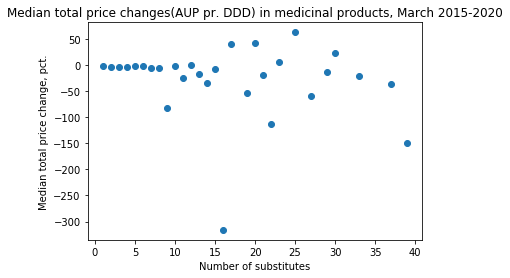

In [101]:
# an additional dataframe is produced including absolute prices instead of period by period changes
# this provides summary data from start till end of data
# index is reset
merged_abs = pd.merge(grouped_prices, dups_ATC, on='ATC', how='left').reset_index()

# removing all columns except number of dublicates, ATC, and data for the first and last price report
merged_abs = merged_abs.filter(['ATC','dublicates', 20150202, 20200323])

# rename columns
merged_abs= merged_abs.rename(columns = {20150202:'first_price', 20200323: 'last_price'})

# calculate percentage change from first price (20150202) to last price (20200323)
merged_abs['total_pct_change'] = merged_abs.apply(lambda row: ((row.last_price-row.first_price)/row.last_price)*100, axis=1)

# find median of price changes for each ATC-group
merged_abs_grouped = merged_abs.groupby('dublicates').agg(['median']).round(2).reset_index()

# show in both summary table as well as a scatter plot
display(merged_abs_grouped)
plt.scatter(merged_abs_grouped['dublicates'], merged_abs_grouped['total_pct_change'])
plt.title('Median total price changes(AUP pr. DDD) in medicinal products, March 2015-2020')
plt.xlabel('Number of substitutes')
plt.ylabel('Median total price change, pct.')
plt.show()

The above scatter plot fails to point out any clear correlation between total price changes from 02/02/2015 to 23/03/2020 of consumer medicinal products and competition. From the presented numbers and figures it is not apparent that more competition as in more substitutes breeds lower price increases. It should be noted, however, that the variance of the median of price changes increases dramatically when substitutes exceed eight. No intuitive reason for this has been identified.

# Conclusion

Despite pursuing several different angles of attack, no clear connection could be found betweem price changes in pharmaceutical products and the level of competition. It should be considered that this analysis is hampered by a quite rough cleaning of data--only products for which data is available for the entire period is included. Relaxing this and perhaps examining shorter periods or the effects of new introductions of substitutes might be fruitful. Furthermore, a comprehensive regression might show interesting results.